In [1]:
import numpy as np
import numpy as np, h5py
from scipy import signal
import scipy.io
from scipy.fftpack import fft

import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams["figure.figsize"] = [15, 8]

#### generate wave

In [3]:
time = np.linspace(0, 3, 3000)

In [4]:
wave = (
    np.sin(time * 2 * np.pi * 1)
    + np.sin(time * 2 * np.pi * 10)
    + np.sin(time * 2 * np.pi * 50)
)

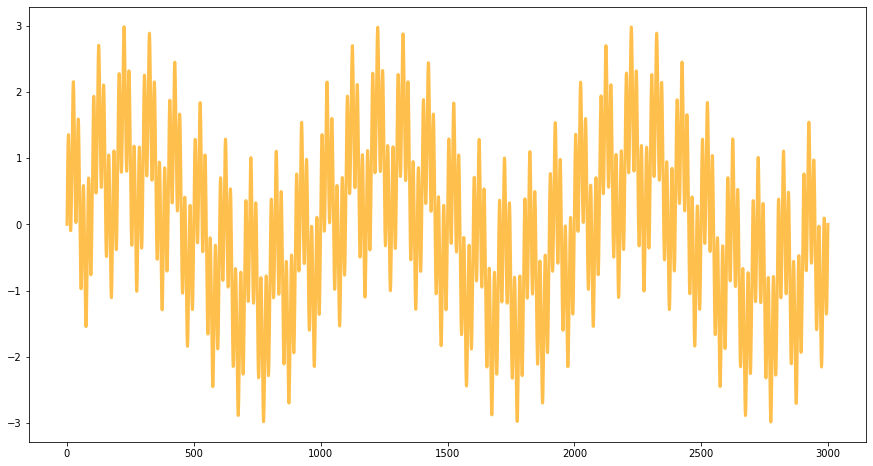

In [5]:
plt.plot(wave, linewidth=3, c="orange", alpha=0.7)

#### Fourier transform

#### definition: $f(ξ) = \int_{-\infty}^{\infty} f(x) \cdot e^{-2i \pi ξ x} dx$

#### Scipy implementation: $f(ξ) = \sum_{n=0}^{N-1} x_n \cdot e^{\frac{-2 i \pi ξ n}{N}}$

In [7]:
ft_wave = fft(wave)

(0.0, 60.0)

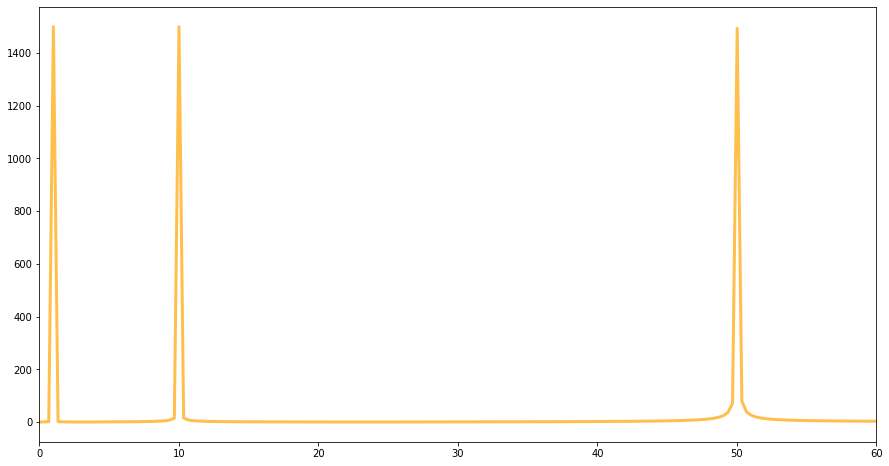

In [8]:
plt.plot(
    np.linspace(0, 1000, 3000), np.abs(ft_wave), linewidth=3, c="orange", alpha=0.7
)
plt.xlim(0, 60)

In [9]:
ft_wave_freqs = {n: wave * np.exp(2 * np.pi * 1j * time * n) for n in [10, 20, 30]}

In [10]:
colors = {10: "#286d87", 20: "#d57211", 30: "#4fb49d"}

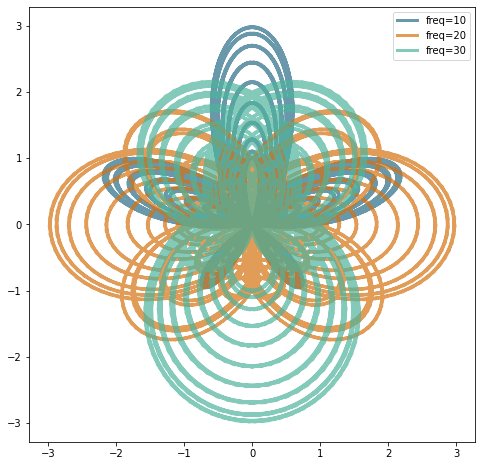

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

for k, v in ft_wave_freqs.items():
    ax.plot(v.real, v.imag, c=colors[k], label=f"freq={k}", linewidth=3, alpha=0.7)
ax.legend()

#### Apply filter

In [12]:
sos_sample = signal.butter(
    10,
    (5 / 3000 * np.pi, 20 / 3000 * np.pi),
    btype="bandpass",
    fs=1 / 3 * np.pi,
    output="sos",
)

In [13]:
filtered_sample = signal.sosfiltfilt(sos_sample, wave)

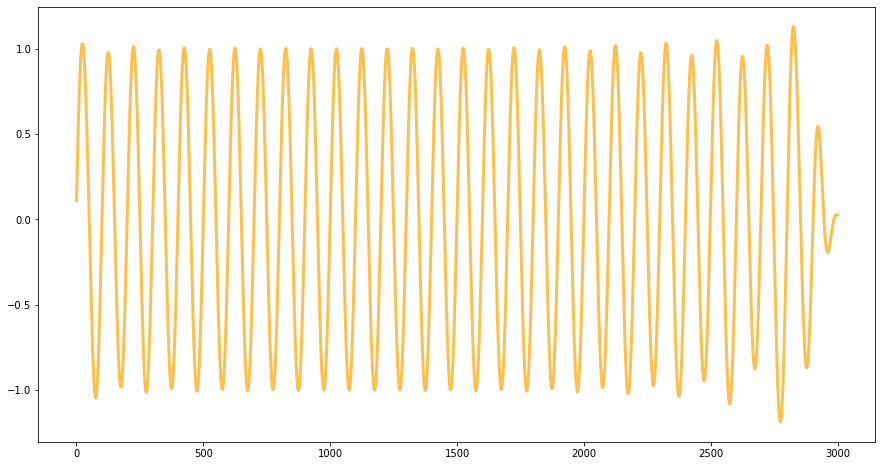

In [14]:
plt.plot(filtered_sample, linewidth=3, c="orange", alpha=0.7)

In [15]:
ft_filtered_sample = fft(filtered_sample)

(0.0, 60.0)

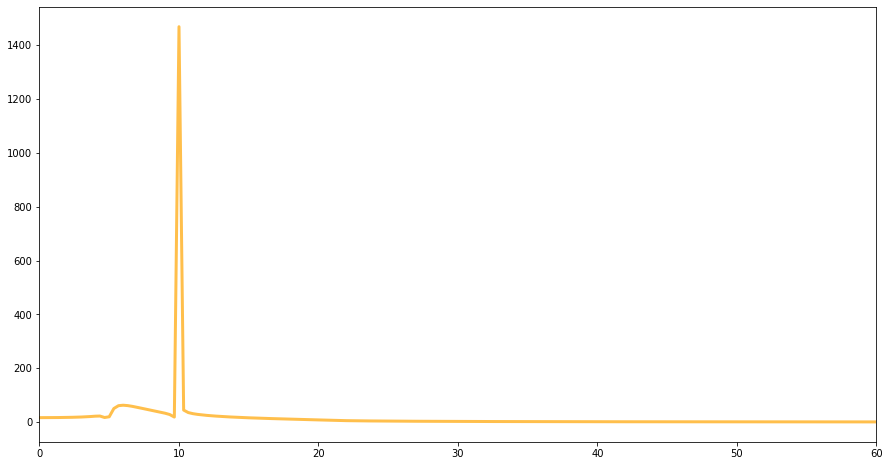

In [16]:
plt.plot(
    np.linspace(0, 1000, 3000),
    np.abs(ft_filtered_sample),
    linewidth=3,
    c="orange",
    alpha=0.7,
)
plt.xlim(0, 60)